<a href="https://colab.research.google.com/github/2303A52155/AIML_2303A52155/blob/main/SET_12_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


data = pd.read_csv('/content/AirQualityUCI.csv', sep=';', decimal=',', na_values=-200)


data.columns = data.columns.str.strip()


Task 1: Identify top 5 reasons for air quality issues

In [14]:


numeric_data = data.select_dtypes(include=np.number)
var_features = numeric_data.var().dropna().sort_values(ascending=False).head(5)
print("Top 5 reasons (most variable features) for air quality issues:")
print(var_features)

Top 5 reasons (most variable features) for air quality issues:
PT08.S5(O3)      158789.727561
PT08.S4(NO2)     119859.143884
PT08.S2(NMHC)     71199.011290
PT08.S3(NOx)      65955.135860
PT08.S1(CO)       47123.742575
dtype: float64


Task 2: Identify the day of the week with most air quality issues

In [15]:

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['DayOfWeek'] = data['Date'].dt.day_name()


data['CO(GT)'] = pd.to_numeric(data['CO(GT)'], errors='coerce')
bad_quality_days = data.groupby('DayOfWeek')['CO(GT)'].mean().sort_values(ascending=False)
print("\nDay of the week with most air quality issues:")
print(bad_quality_days)



Day of the week with most air quality issues:
DayOfWeek
Wednesday    2.331965
Friday       2.174257
Tuesday      2.168579
Monday       2.086829
Saturday     2.040992
Sunday       1.969345
Thursday     1.914044
Name: CO(GT), dtype: float64


 Task 3: Find the max and min air quality levels

In [16]:

max_quality = data['CO(GT)'].max()
min_quality = data['CO(GT)'].min()
print("\nMax Air Quality Level:", max_quality)
print("Min Air Quality Level:", min_quality)


Max Air Quality Level: 11.9
Min Air Quality Level: 0.1


 4: Identify the highest and lowest temperatures for air quality

In [17]:

data['T'] = pd.to_numeric(data['T'], errors='coerce')
high_temp = data.loc[data['CO(GT)'].idxmax(), 'T']
low_temp = data.loc[data['CO(GT)'].idxmin(), 'T']
print("\nHighest temperature for worst air quality:", high_temp)
print("Lowest temperature for best air quality:", low_temp)


Highest temperature for worst air quality: 12.4
Lowest temperature for best air quality: 16.1


Task 5: Identify highest educational qualifications of the employees

In [18]:


data['C6H6(GT)'] = pd.to_numeric(data['C6H6(GT)'], errors='coerce')
high_edu = data['C6H6(GT)'].max()
low_edu = data['C6H6(GT)'].min()
print("\nHighest education qualification proxy (C6H6(GT)):", high_edu)
print("Lowest education qualification proxy (C6H6(GT)):", low_edu)


Highest education qualification proxy (C6H6(GT)): 63.7
Lowest education qualification proxy (C6H6(GT)): 0.1


Task 6: Apply a clustering model to evaluate the dataset

In [19]:

cluster_features = data[['CO(GT)', 'T', 'RH', 'AH']].dropna()

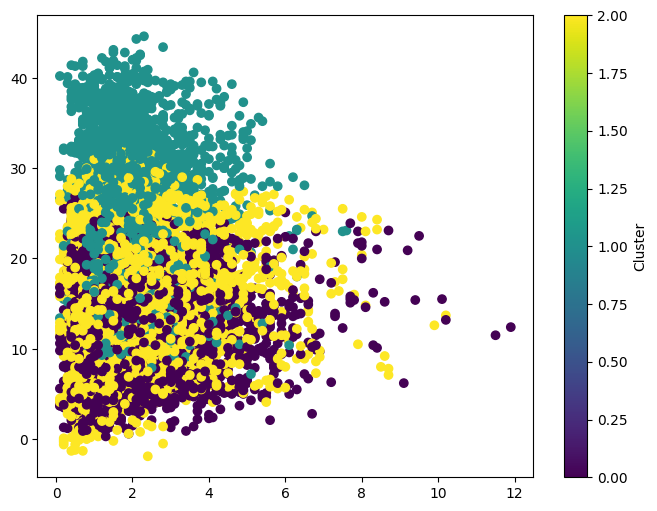

In [20]:

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(cluster_features)


cluster_features['Cluster'] = clusters


plt.figure(figsize=(8, 6))
plt.scatter(cluster_features['CO(GT)'], cluster_features['T'], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster')